In [ ]:
import zipfile
import os

# Replace 'images.zip' with the actual name of your zip file
zip_path = '/content/MAHEEN FATIMA - v_data.zip'
extracted_dir = '/content/extracted_images'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Define paths for train and test directories
train_dir = '/content/extracted_images/v_data/train'
test_dir = '/content/extracted_images/v_data/test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Change to 'softmax' if you have more than two classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  # You can increase the number of epochs for better training
model.fit(train_generator, epochs=epochs)


Epoch 1/10
13/13 [==============================] - 23s 2s/step - loss: 0.8783 - accuracy: 0.6100
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 0.5314 - accuracy: 0.7700
Epoch 3/10
13/13 [==============================] - 21s 2s/step - loss: 0.3923 - accuracy: 0.8150
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 0.3546 - accuracy: 0.8525
Epoch 5/10
13/13 [==============================] - 29s 2s/step - loss: 0.2999 - accuracy: 0.8750
Epoch 6/10
13/13 [==============================] - 22s 2s/step - loss: 0.2427 - accuracy: 0.9000
Epoch 7/10
13/13 [==============================] - 22s 2s/step - loss: 0.2027 - accuracy: 0.9200
Epoch 8/10
13/13 [==============================] - 22s 2s/step - loss: 0.1978 - accuracy: 0.9075
Epoch 9/10
13/13 [==============================] - 23s 2s/step - loss: 0.3182 - accuracy: 0.8650
Epoch 10/10
13/13 [==============================] - 22s 2s/step - loss: 0.2758 - accuracy: 0.8900


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.2f}")


4/4 [==============================] - 2s 295ms/step - loss: 0.2861 - accuracy: 0.8900
Test accuracy: 0.89


Enter the path of image you want to be predicted: /content/extracted_images/v_data/test/cars/1.jpg


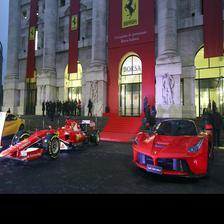

1/1 [==============================] - 0s 38ms/step
[[0.0330698]]
0
The test image is predicted to be a car.


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

imagepatheInput = input('Enter the path of image you want to be predicted: ')

imagewegot = cv2.imread(imagepatheInput)

cv2_imshow(imagewegot)


# Load the test image and preprocess it
test_image = load_img(imagepatheInput, target_size=(img_width, img_height))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Make the prediction
prediction = model.predict(test_image)
print(prediction)


predictedLabel = np.argmax(prediction)

print(predictedLabel)



# Get the class label (assuming binary classification)
if prediction[0][0] < 0.5:
    class_label = 'car'
else:
    class_label = 'plane'

print(f"The test image is predicted to be a {class_label}.")



Enter the path of image you want to be predicted: /content/extracted_images/v_data/test/planes/14.jpg


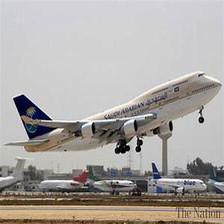

1/1 [==============================] - 0s 56ms/step
[[0.9950302]]
0
The test image is predicted to be a plane.


In [ ]:
imagepatheInput = input('Enter the path of image you want to be predicted: ')

imagewegot = cv2.imread(imagepatheInput)

cv2_imshow(imagewegot)


# Load the test image and preprocess it
test_image = load_img(imagepatheInput, target_size=(img_width, img_height))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Make the prediction
prediction = model.predict(test_image)
print(prediction)


predictedLabel = np.argmax(prediction)

print(predictedLabel)



# Get the class label (assuming binary classification)
if prediction[0][0] < 0.5:
    class_label = 'car'
else:
    class_label = 'plane'

print(f"The test image is predicted to be a {class_label}.")

